# Assignment-3

**Naganathan Meenakshi Sundareswaran**

**nm749@njit.edu**


The aim of the assignment is to build two classification models that detect emotions from the given text data. Multinomial Naive Bayes and RNN models are built and the performance is compared. For the purpose, labeled datasets are used from the resource mentioned below.


---

The datasets for the emotion detection task has been taken referencing the resources:

https://www.frontiersin.org/articles/10.3389/fpsyg.2023.1190326/full,


https://kristina.machova.website.tuke.sk/useful/DATA%20for%20EMOTION%20DETECTION/

The three datasets from the resource for Neural Net models - training, validation and test are being used.

### Reading data

In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# the datasets are read from the repository directly

train_url = 'https://kristina.machova.website.tuke.sk/useful/DATA%20for%20EMOTION%20DETECTION/train%20dataset%20for%20NN%20model.txt'
validation_url = 'https://kristina.machova.website.tuke.sk/useful/DATA%20for%20EMOTION%20DETECTION/validation%20dataset%20for%20NN%20model.txt'
test_url = 'https://kristina.machova.website.tuke.sk/useful/DATA%20for%20EMOTION%20DETECTION/test%20dataset%20for%20NN%20model.txt'

In [3]:
read_train_data = pd.read_csv(train_url,sep=";", header=None)

In [4]:
read_train_data.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
# notice that there are no headings for the columns and hence the two columns are named 'Text' and 'Emotion' respectively in each of the data frame

train = pd.read_csv(train_url,sep=";", header=None, names=["Text", "Emotion"]) # training dataset
validation = pd.read_csv(validation_url,sep=";", header=None, names=["Text", "Emotion"]) # validation dataset
test = pd.read_csv(test_url,sep = ';', header = None, names =["Text", "Emotion"]) # test dataset

### EDA and visulaization

In [6]:
# to get an idea if there are any null values and the number of rows and columns
print("Info of the training data set:\n")
print(train.info())
# the number of rows and columns and the total size
print("\n") # used for asthetics
print("The size of the training data:", train.size)
print("The shape of the training data: {} rows".format(train.shape[0]), "X {} columns". format(train.shape[1]))

Info of the training data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
None


The size of the training data: 32000
The shape of the training data: 16000 rows X 2 columns


In [7]:
print("Info of the validation data set:\n")
print(validation.info())
print("\n")
print("The size of the training data:", validation.size)
print("The shape of the training data: {} rows".format(validation.shape[0]), "X {} columns". format(validation.shape[1]))

Info of the validation data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


The size of the training data: 4000
The shape of the training data: 2000 rows X 2 columns


In [8]:
print("Info of the test data set:\n")
print(test.info())
print("\n")
print("The size of the training data:", test.size)
print("The shape of the training data: {} rows".format(test.shape[0]), "X {} columns". format(test.shape[1]))

Info of the test data set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


The size of the training data: 4000
The shape of the training data: 2000 rows X 2 columns


Since all three datasets are having non-null values, and two columns of text and emotion, all the three are merged to create a big dataset, which will be split into training and testing data while building model. The prime reason for doing so is that TF-IDF is employed to extract features. The model trained on vectorized data with certain number of features, cannot be applied on test data with a different number of features after vectorizing it. Error occurs due to mismatach of the number of features.

In [9]:
df_trainData = pd.concat([train, validation, test], ignore_index=True)
print("\n","A glimpse of newly formed data:\n")
print(df_trainData.info())
# the number of rows and columns and the total size
print("\n")
print("The size of the training data:", df_trainData.size)
print("The shape of the training data: {} rows".format(df_trainData.shape[0]), "X {} columns". format(df_trainData.shape[1]))

print("\n")
print(df_trainData.head())



 A glimpse of newly formed data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB
None


The size of the training data: 40000
The shape of the training data: 20000 rows X 2 columns


                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [10]:
print("The unique emotions in train dataset are: ", list(df_trainData.Emotion.unique()), "\n Thus there are totally {} classes in the training data". format(df_trainData.Emotion.nunique()))

The unique emotions in train dataset are:  ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'] 
 Thus there are totally 6 classes in the training data


In [11]:
print("Count of each emotion:\n")
df_plotDistribution = pd.DataFrame(df_trainData['Emotion'].value_counts()).reset_index()
df_plotDistribution.columns = ['unique_emotions', 'count_of_each_emotion']
print(df_plotDistribution)

Count of each emotion:

  unique_emotions  count_of_each_emotion
0             joy                   6761
1         sadness                   5797
2           anger                   2709
3            fear                   2373
4            love                   1641
5        surprise                    719


A plot for the categorical categorical emotions:



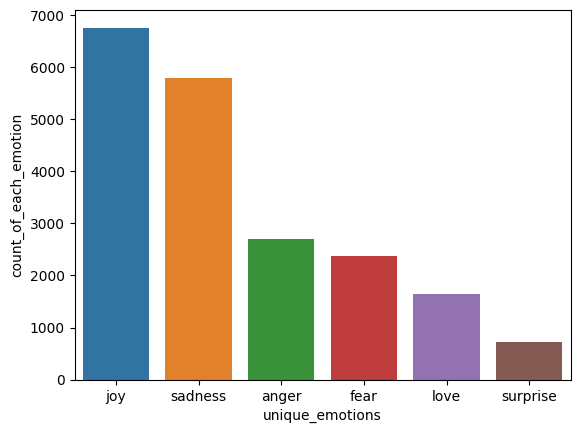

In [12]:
print("A plot for the categorical categorical emotions:\n")
sns.barplot(data=df_plotDistribution, x=df_plotDistribution["unique_emotions"], y=df_plotDistribution["count_of_each_emotion"])
plt.show()

Percentage of each emotion in the dataset pie plot: 



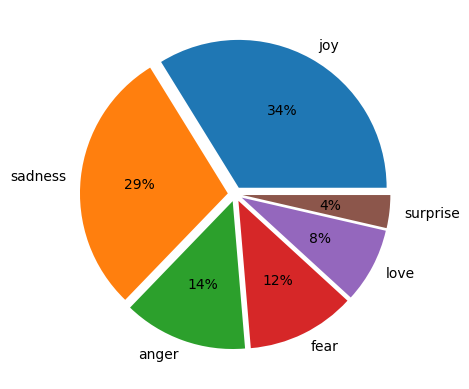

In [13]:
print("Percentage of each emotion in the dataset pie plot: \n")
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
# explode determines how big or small the split among each pie will be; here 0.05 seems optimal for visualization
plt.pie(df_plotDistribution['count_of_each_emotion'], autopct='%1.0f%%', labels = df_plotDistribution['unique_emotions'], explode = explode)
# the autopct is to give a fomrat for the percentage number figures whether to be float values with decimal or as integers
# tested options are: 1.0, 1.1, and 1.11 in the format %1.0f%%
plt.show()

### Text normalization

Now that there is an overall idea of the data - the text and the corresponding emotions, the next step is process the text - tokenize, remove stop words, stemming and lemmatizing as required and apply a feature extraction technique. TF-IDF is employed for feature extraction.

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
def text_Normalization (text):
  # special characters from the text are removed
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I)
  # the text is tokenized into word tokens using word tokenizer from nltk
  text_tokens = nltk.word_tokenize(text.lower())
  # filter out stopwords from text
  filtered_tokens = [token for token in text_tokens if token not in stop_words]
  # join the fitered tokens after removing stop words
  text_StopWordsRemoved = ' '.join(filtered_tokens)
  # lemmatize the text using Word Lemmatizer from nltk
  processed_text = lemmatizer.lemmatize(text_StopWordsRemoved)
  return processed_text

In [16]:
# text normalization
def dataFrametextNomralization(_dataFrame):
    _dataFrame["normalized_Text"] = _dataFrame["Text"].apply(text_Normalization)
    _dataFrame = _dataFrame.drop('Text', axis=1)
    _dataFrame = _dataFrame[["normalized_Text","Emotion"]]
    return _dataFrame

In [17]:
normalized_trainData = dataFrametextNomralization(df_trainData)

In [18]:
def createTextCloud(an_emotion):
  textCloud = ""
  TempDf =  normalized_trainData.loc[normalized_trainData['Emotion'] == an_emotion]
  for textContent in TempDf["normalized_Text"].values:
    textCloud += textContent
  # Create and generate a word cloud image:
  wordcloud = WordCloud().generate(textCloud)
  # Display the generated image:
  print("\n","Word cloud for {}".format(an_emotion),"\n")
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  return


 Word cloud for sadness 



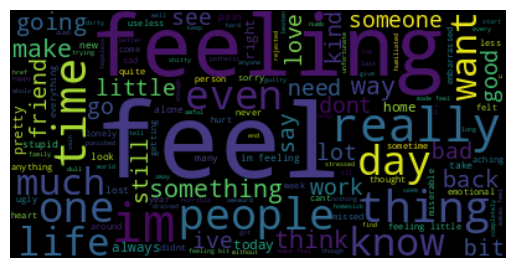


 Word cloud for anger 



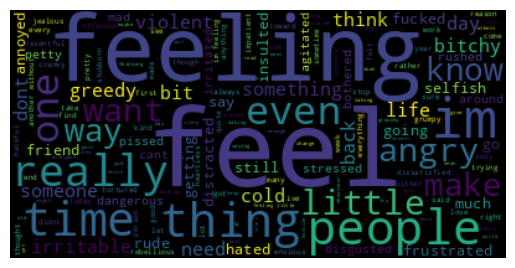


 Word cloud for love 



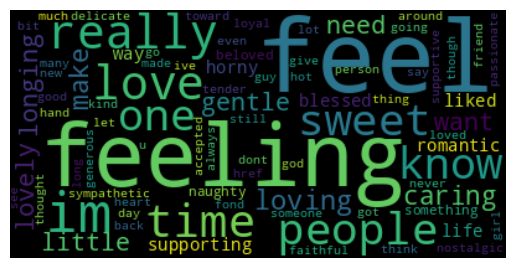


 Word cloud for surprise 



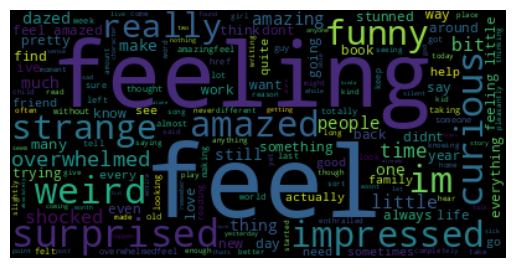


 Word cloud for fear 



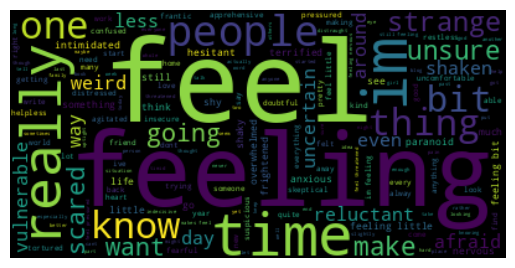


 Word cloud for joy 



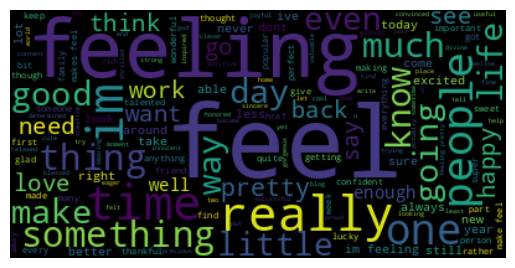

In [19]:
# create a word cloud for training data
for an_emotion in list(normalized_trainData.Emotion.unique()):
  createTextCloud(an_emotion)

It seems the word(s) feel/feeling is present in text of all the emotion classes. In the following section, we use TF-IDF vectorizer for feature extraction, which has an attribute 'ngram_range' in which the range of n-values for different n-grams to be extracted can be mentioned.

### Feature extraction with TF-IDF and model building - Naive Bayes

In [20]:
tfidfvectorizer = TfidfVectorizer(stop_words= 'english', ngram_range=(1, 2))

In [21]:
X =  tfidfvectorizer.fit_transform(normalized_trainData["normalized_Text"])
y = normalized_trainData["Emotion"]
print("The number of samples and features are: %d, %d" % X.shape)

The number of samples and features are: 20000, 118763


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle = True)

#Train score: 0.776
#Test score: 0.666
Confusion matrix:
              precision    recall  f1-score   support

     sadness       0.96      0.23      0.38       540
       anger       0.90      0.21      0.34       442
        love       0.58      0.99      0.73      1335
    surprise       1.00      0.03      0.06       332
        fear       0.75      0.93      0.83      1195
         joy       1.00      0.01      0.01       156

    accuracy                           0.67      4000
   macro avg       0.87      0.40      0.39      4000
weighted avg       0.77      0.67      0.59      4000



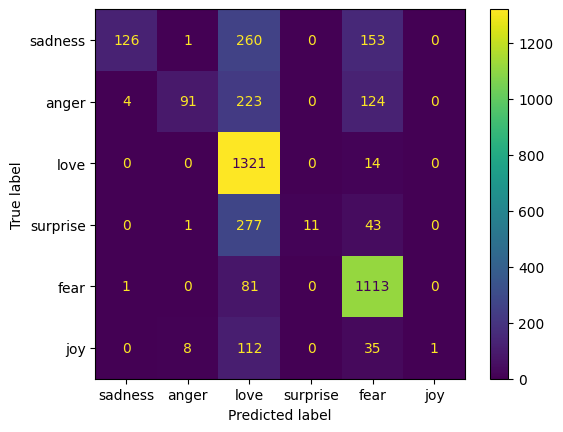

In [23]:
mNB = MultinomialNB()
mNB.fit(X_train, y_train)
y_pred = mNB.predict(X_test)

print('#Train score: {:.3f}'.format(mNB.score(X_train,y_train)))
print('#Test score: {:.3f}'.format(mNB.score(X_test, y_test)))

print("Confusion matrix:")
print(metrics.classification_report(y_test, y_pred, target_names=list(df_trainData.Emotion.unique())))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred), display_labels = list(df_trainData.Emotion.unique()))
cm_display.plot()
plt.show()

### Model Building RNN - LSTM

In [24]:
# label encoder to convert emotion classes to numerical labels as the deep neural
# netwroks need numerical data (the representations of actual data)
label_encoder = LabelEncoder()
df_trainData["Emotion"] = label_encoder.fit_transform(df_trainData["Emotion"])

In [25]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_trainData["normalized_Text"])
X_rnn = tokenizer.texts_to_sequences(df_trainData["normalized_Text"])

# Padding to make sequences the same length
max_sequence_length = max(len(seq) for seq in X_rnn)
X_rnn = pad_sequences(X_rnn, maxlen=max_sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, df_trainData["Emotion"], test_size=0.2, random_state=42, shuffle=True)


In [26]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [27]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
250/250 [==============================] - 28s 105ms/step - loss: 1.1283 - accuracy: 0.5805 - val_loss: 0.4432 - val_accuracy: 0.8577
Epoch 2/10
250/250 [==============================] - 27s 107ms/step - loss: 0.2211 - accuracy: 0.9231 - val_loss: 0.2282 - val_accuracy: 0.9145
Epoch 3/10
250/250 [==============================] - 27s 109ms/step - loss: 0.0841 - accuracy: 0.9718 - val_loss: 0.2374 - val_accuracy: 0.9158
Epoch 4/10
250/250 [==============================] - 26s 104ms/step - loss: 0.0495 - accuracy: 0.9836 - val_loss: 0.3342 - val_accuracy: 0.9038
Epoch 5/10
250/250 [==============================] - 27s 107ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.2783 - val_accuracy: 0.9140
Epoch 6/10
250/250 [==============================] - 26s 104ms/step - loss: 0.0314 - accuracy: 0.9894 - val_loss: 0.2998 - val_accuracy: 0.9130
Epoch 7/10
250/250 [==============================] - 27s 110ms/step - loss: 0.0220 - accuracy: 0.9920 - val_loss: 0.3029 - val_ac

In [28]:
# RNN model evaluation

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

y_pred_rnn = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_rnn, axis=1)  # Convert softmax output to class labels


report = metrics.classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print("Confusion matrix:")
print(report)


125/125 [==============================] - 3s 27ms/step - loss: 0.3586 - accuracy: 0.9110
Test loss: 0.3586185574531555, Test accuracy: 0.9110000133514404
125/125 [==============================] - 3s 19ms/step
Confusion matrix:
              precision    recall  f1-score   support

       anger       0.92      0.92      0.92       540
        fear       0.87      0.84      0.86       442
         joy       0.93      0.92      0.93      1335
        love       0.82      0.79      0.80       332
     sadness       0.94      0.97      0.96      1195
    surprise       0.78      0.78      0.78       156

    accuracy                           0.91      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.91      0.91      0.91      4000



### Conclusion

Comparing the evaluation of the two models - which, here is for classification and hence the metrics - precision, recall, f1-score and accuracy, it is evident that RNN-LSTM model performed well than the Multinomial Naive Bayes (MNB). The overall accuracy for RNN-LSTM is 91% whereas it's only 67% for MNB.

If the metric 'recall' is considered, the ratio of predicted correct lables against the actual correct labels (True Positive/(True Positive + False Negative)), again, RNN did better. It might seem that for the emotion classes love and fear thee is a decrease but for all other labels, especially joy and surprise, there is a drastic increase from 1% to 92% and 78% respectively.

It can be inferred that RNN model performed better overall. The feature extraction might have also played a role. TF-IDF is used for MNB whereas sequence tokenization used in RNN.

**References used to complete the assignment**

https://singhharsh246.medium.com/stemming-and-lemmatization-5eae497d1417

https://www.kaggle.com/code/astraz93/beginners-tokenization-stemming-and-lemmatization

https://www.kaggle.com/code/pashupatigupta/starter-notebook-a-to-z-emotion-detection

https://mylearningsinaiml.wordpress.com/ml-models/feature-engineering/feature-engineering-text-data/

https://thinkingneuron.com/how-to-visualize-data-distribution-of-a-categorical-variable-in-python/

https://thinkingneuron.com/support-ticket-classification-using-tf-idf-vectorization/

https://mayurji.github.io/blog/2021/09/20/Tf-Idf

https://medium.com/analytics-vidhya/fundamentals-of-bag-of-words-and-tf-idf-9846d301ff22

https://medium.com/in-pursuit-of-artificial-intelligence/brief-introduction-to-n-gram-and-tf-idf-tokenization-e58d22555bab

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/

https://sanjayc.medium.com/scikit-learn-train-test-split-random-state-and-shuffle-10dbbb031170
